In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.tree import export_graphviz

In [2]:
data = pd.read_csv('Height_Age_Dataset.csv')
data.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [3]:
## store the data in the form of dependent and independent variables separately
X = data.iloc[:, 0:1].values
y = data.iloc[:, 1].values

In [5]:
## split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
## create a decision tree regressor object from DecisionTreeRegressor class
DtReg = DecisionTreeRegressor(random_state=0)

## fit the decision tree regressor with training data represented by X_train and y_train
DtReg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [10]:
## predict height from test dataset with regard to Decision Tree Regression
y_predict_dtr = DtReg.predict((X_test))

## model evaluation using R-Square for Decision Tree Regression
r_square = metrics.r2_score(y_test, y_predict_dtr)
print("R-Square Error associated with Decision Tree Regression is:", r_square)

R-Square Error associated with Decision Tree Regression is: 0.9941828370498541


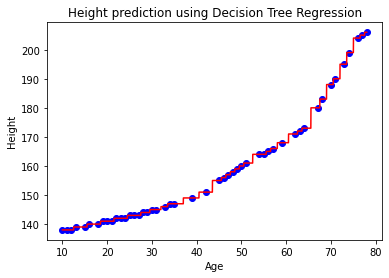

<Figure size 72x72 with 0 Axes>

In [11]:
## Visualize the Decision Tree Regression by creating range of values from min value of X_train to max value of having a difference of 0.01 between two consecutive values
X_val = np.arange(min(X_train), max(X_train), 0.01)

# reshape the data into a len(X_val)*1 array in order to make a column out of the X_val values 
X_val = X_val.reshape((len(X_val), 1))

# define a scatter plot for training data 
plt.scatter(X_train, y_train, color='blue')

# plot the predicted data 
plt.plot(X_val, DtReg.predict(X_val), color='red')

# define the title 
plt.title('Height prediction using Decision Tree Regression')

# define X axis label
plt.xlabel('Age')

# define y axis label
plt.ylabel('Height')

# set the size of the plot for better clarity 
plt.figure(figsize=(1,1))

# draw the plot 
plt.show()


In [14]:
## predicting height based on age using Decision tree Regression
height_pred = DtReg.predict([[41]])
print("Predicted Height: % d"% height_pred)

Predicted Height:  151


In [15]:
## visualize it on http://www.webgraphviz.com/?tab=map by copying and pasting related data from .dot file
export_graphviz(DtReg, out_file='dtregression.dot', feature_names=['age'])